In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve
import pickle
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

%matplotlib inline  
sb.set_style('dark')



In [2]:
df= pd.read_csv('Employee Satisfaction Survey Data.csv')

In [3]:
df.head(30)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
df.shape


(14999, 10)

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df1 = df.drop(columns=['left', 'Work_accident','promotion_last_5years'])

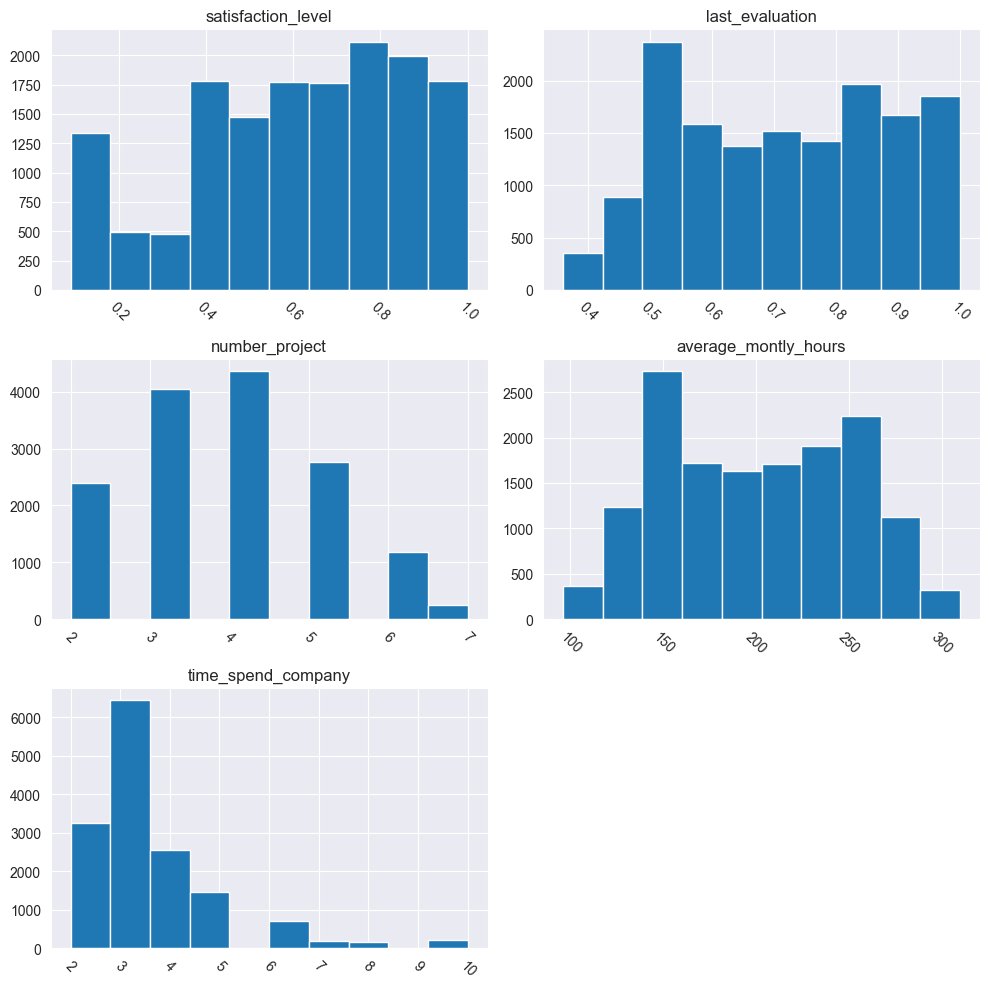

In [7]:
df1.hist(figsize=(10,10),xrot=-45)
plt.tight_layout()
plt.show()


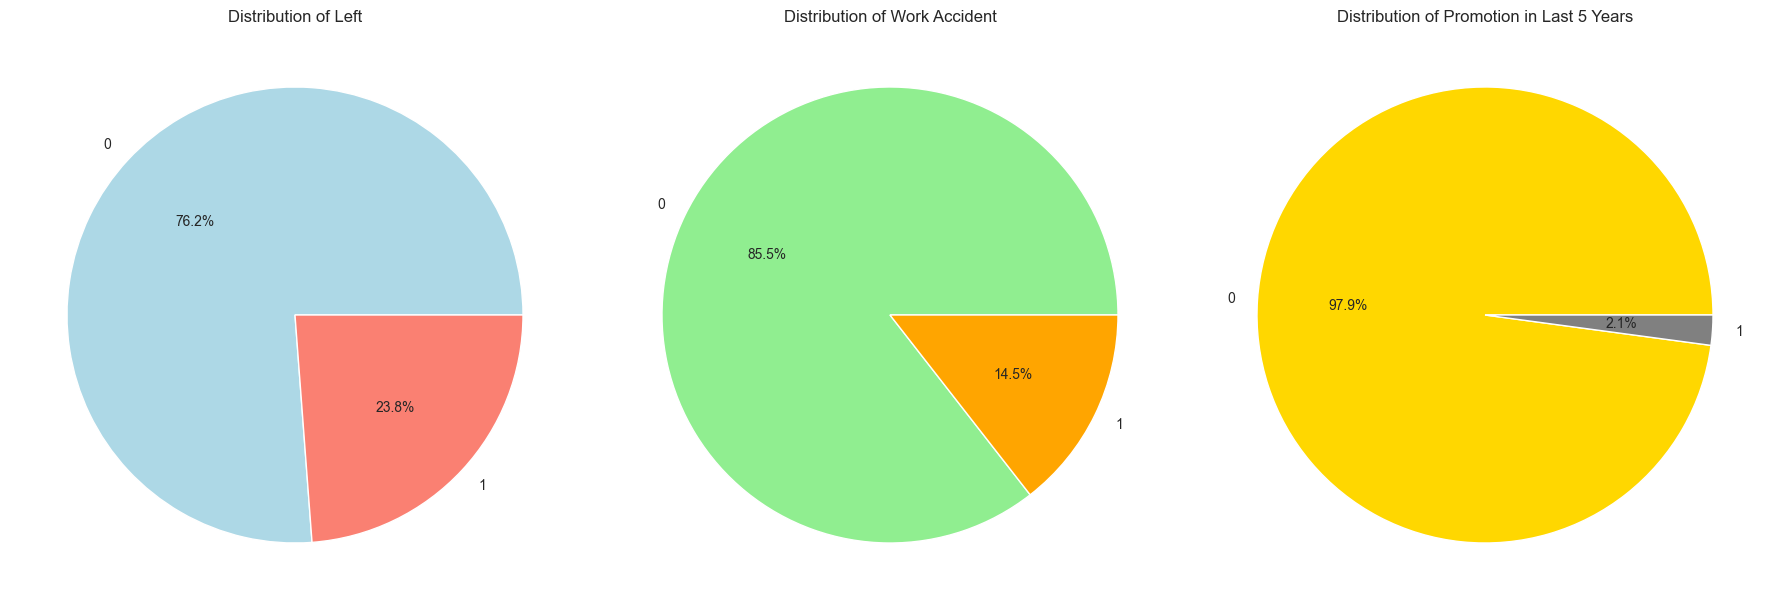

In [8]:

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Vẽ biểu đồ tròn cho cột 'left'
axs[0].pie(df['left'].value_counts(), labels=df['left'].value_counts().index, autopct='%1.1f%%', colors=['lightblue', 'salmon'])
axs[0].set_title('Distribution of Left')


axs[1].pie(df['Work_accident'].value_counts(), labels=df['Work_accident'].value_counts().index, autopct='%1.1f%%', colors=['lightgreen', 'orange'])
axs[1].set_title('Distribution of Work Accident')


axs[2].pie(df['promotion_last_5years'].value_counts(), labels=df['promotion_last_5years'].value_counts().index, autopct='%1.1f%%', colors=['gold', 'grey'])
axs[2].set_title('Distribution of Promotion in Last 5 Years')


plt.tight_layout()
plt.show()


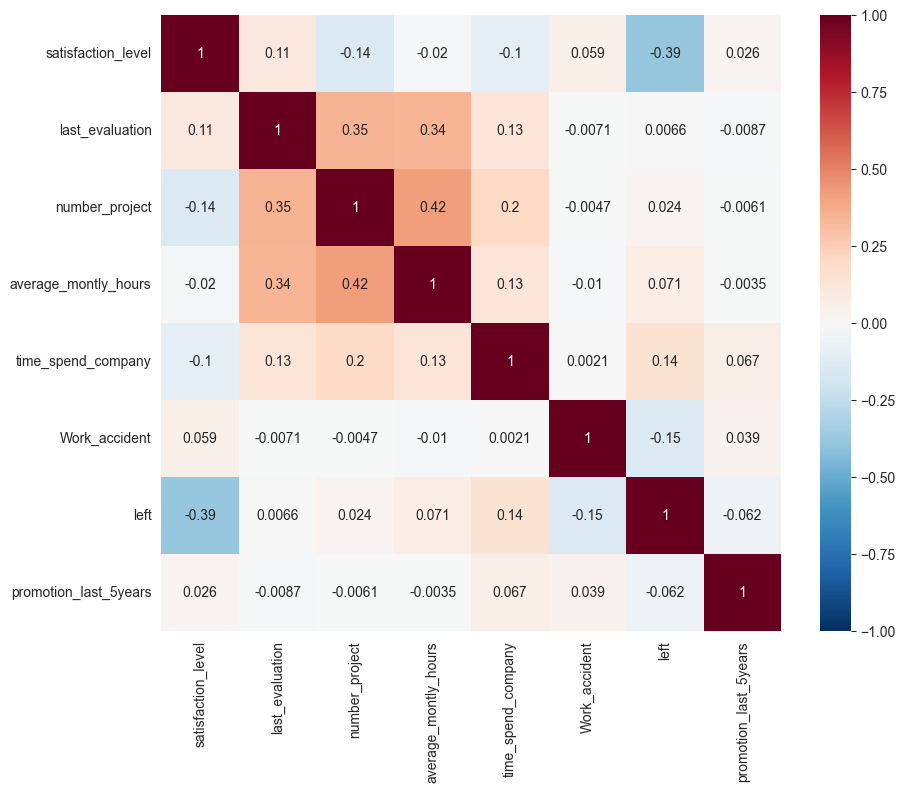

In [9]:
df_numeric = df.drop(columns=['salary', 'sales'], errors='ignore')



corr = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sb.heatmap(corr, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)

plt.show()


the strongest correlation is between number_project and average_monthly_hours

In [10]:
df.describe(include=['object'])


,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


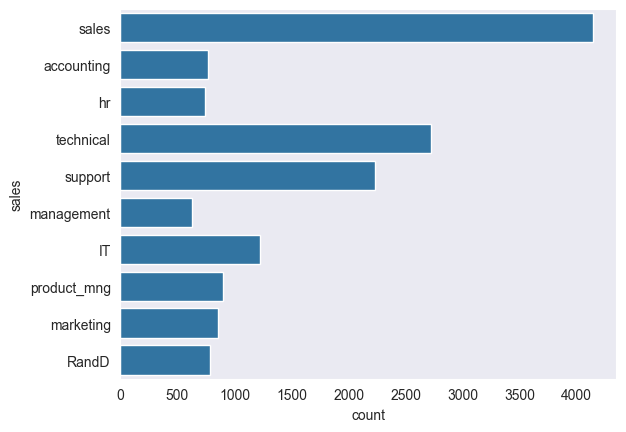

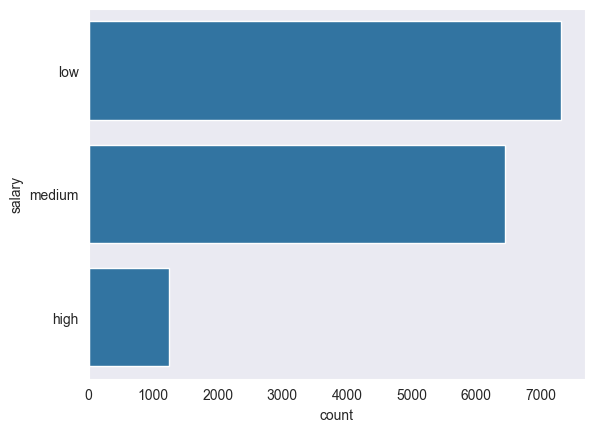

In [11]:
for feature in df.dtypes[df.dtypes=='object'].index:
    sb.countplot(y=feature,data=df)
    plt.show()

In [12]:
df.groupby('sales')['average_montly_hours'].mean()

sales
IT             202.215974
RandD          200.800508
accounting     201.162973
hr             198.684709
management     201.249206
marketing      199.385781
product_mng    199.965632
sales          200.911353
support        200.758188
technical      202.497426
Name: average_montly_hours, dtype: float64

In [13]:
value_counts = df['promotion_last_5years'].value_counts()
print(value_counts)

promotion_last_5years
0    14680
1      319
Name: count, dtype: int64


In [14]:
value_counts = df['left'].value_counts()
print(value_counts)

left
0    11428
1     3571
Name: count, dtype: int64


#### violin between features with employment status

In [15]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

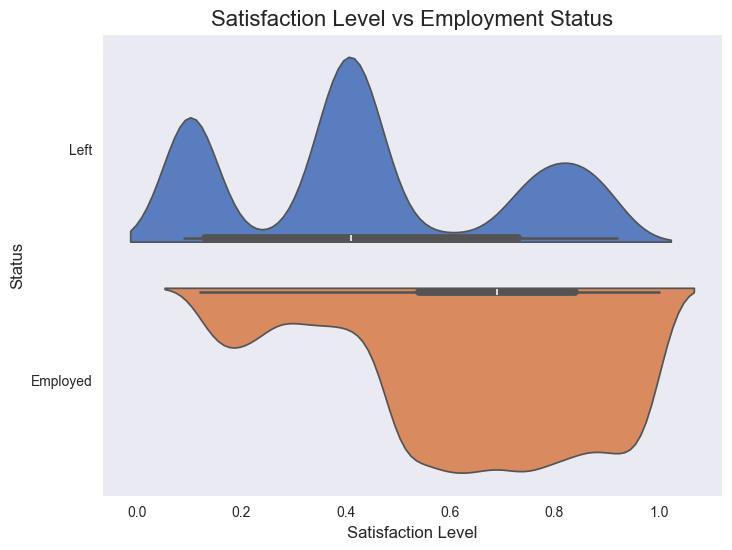

In [16]:
df['status'] = df['left'].map({0: 'Employed', 1: 'Left'})
df['status'] = df['left'].map({0: 'Employed', 1: 'Left'})


plt.figure(figsize=(8, 6))  
sb.violinplot(x='satisfaction_level', y='status', data=df, palette='muted', split=True)


plt.title('Satisfaction Level vs Employment Status', fontsize=16)
plt.xlabel('Satisfaction Level', fontsize=12)
plt.ylabel('Status', fontsize=12)

plt.show()

-Nhân viên đã rời công ty (màu xanh): Có xu hướng tập trung vào mức độ hài lòng thấp (gần 0-0.5), đồng thời có một số ít nhân viên rời đi dù mức độ hài lòng cao (gần 0.5–1.0).

-Nhân viên đang làm việc (màu cam): Tập trung ở mức độ hài lòng cao (gần 0.5–0.9), rất ít người ở mức độ hài lòng thấp.

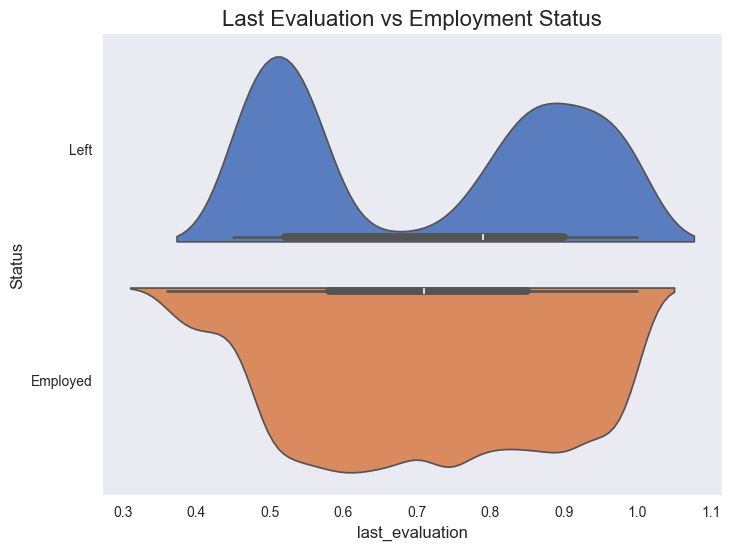

In [17]:
plt.figure(figsize=(8, 6))  
sb.violinplot(x='last_evaluation', y='status', data=df, palette='muted', split=True)


plt.title('Last Evaluation vs Employment Status', fontsize=16)
plt.xlabel('last_evaluation', fontsize=12)
plt.ylabel('Status', fontsize=12)

plt.show()

Những nhân viên rời đi ( màu xanh) có hiệu suất làm việc thấp từ (0.3-0.6) và (0.8-1.0)
Những nhân viên không nghỉ việc (màu cam) được đánh giá hiệu suất cao (0.5-1.0)


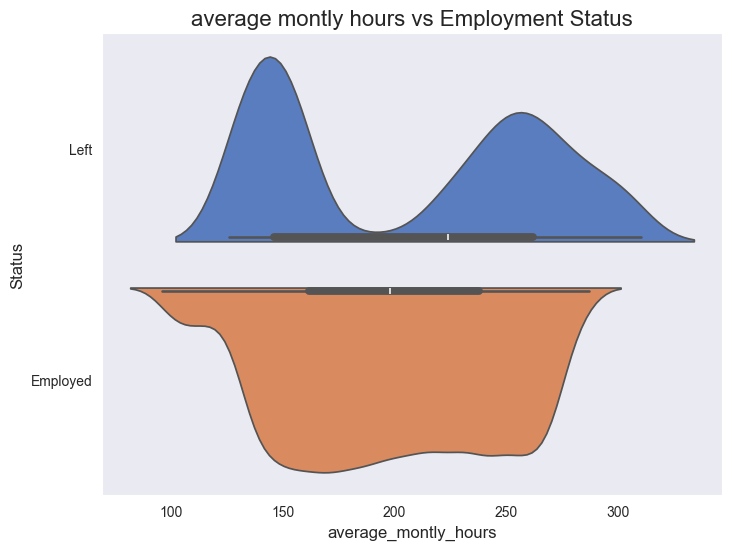

In [18]:
plt.figure(figsize=(8, 6))  
sb.violinplot(x='average_montly_hours', y='status', data=df, palette='muted', split=True)


plt.title('average montly hours vs Employment Status', fontsize=16)
plt.xlabel('average_montly_hours', fontsize=12)
plt.ylabel('Status', fontsize=12)

plt.show()

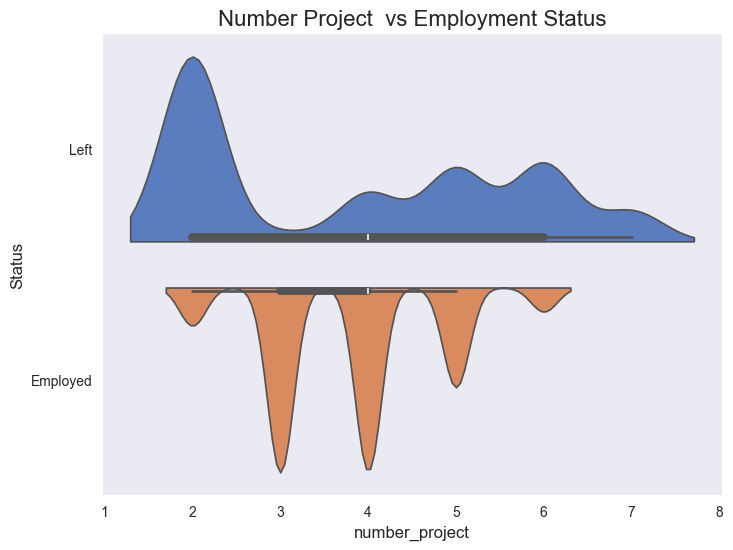

In [19]:
plt.figure(figsize=(8, 6))  
sb.violinplot(x='number_project', y='status', data=df, palette='muted', split=True)


plt.title('Number Project  vs Employment Status', fontsize=16)
plt.xlabel('number_project', fontsize=12)
plt.ylabel('Status', fontsize=12)

plt.show()

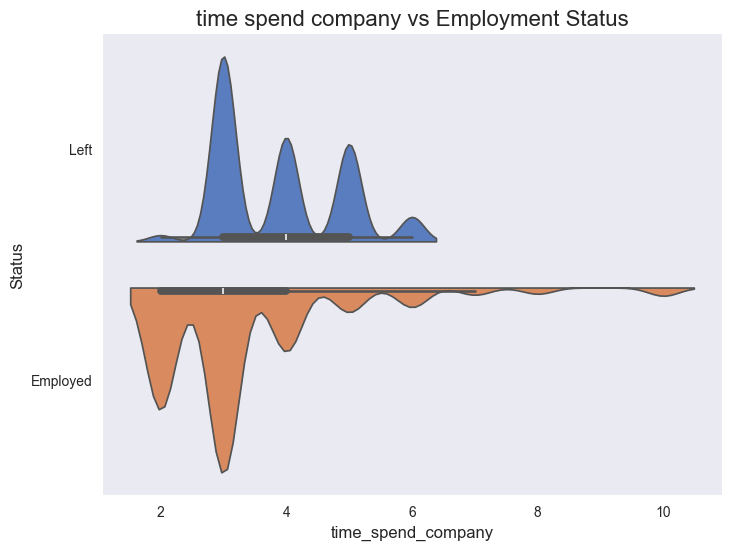

In [20]:
plt.figure(figsize=(8, 6))  
sb.violinplot(x='time_spend_company', y='status', data=df, palette='muted', split=True)


plt.title('time spend company vs Employment Status', fontsize=16)
plt.xlabel('time_spend_company', fontsize=12)
plt.ylabel('Status', fontsize=12)

plt.show()

### 2. Data pre-processing


##### drop duplicate

In [21]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(14999, 11)
(11991, 11)


##### missing value

In [22]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
status                   0
dtype: int64

In [23]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,status
0,0.38,0.53,2,157,3,0,1,0,sales,low,Left
1,0.80,0.86,5,262,6,0,1,0,sales,medium,Left
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Left
3,0.72,0.87,5,223,5,0,1,0,sales,low,Left
4,0.37,0.52,2,159,3,0,1,0,sales,low,Left


##### label encoding


In [24]:
df['salary_num'] = df.salary.replace({"low":0,'medium':1,'high':2})
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,status,salary_num
0,0.38,0.53,2,157,3,0,1,0,sales,low,Left,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,Left,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Left,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,Left,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,Left,0


##### one-hot encoding

In [25]:
df = pd.get_dummies(df,columns=['salary','sales'])

In [26]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
status                    object
salary_num                 int64
salary_high                 bool
salary_low                  bool
salary_medium               bool
sales_IT                    bool
sales_RandD                 bool
sales_accounting            bool
sales_hr                    bool
sales_management            bool
sales_marketing             bool
sales_product_mng           bool
sales_sales                 bool
sales_support               bool
sales_technical             bool
dtype: object

In [27]:
print(df.columns)


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'status', 'salary_num', 'salary_high',
       'salary_low', 'salary_medium', 'sales_IT', 'sales_RandD',
       'sales_accounting', 'sales_hr', 'sales_management', 'sales_marketing',
       'sales_product_mng', 'sales_sales', 'sales_support', 'sales_technical'],
      dtype='object')


In [28]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,status,salary_num,salary_high,salary_low,salary_medium,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,Left,0,False,True,False,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,Left,1,False,False,True,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,Left,1,False,False,True,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,Left,0,False,True,False,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,Left,0,False,True,False,False,False,False,False,False,False,False,True,False,False


In [29]:
bool_columns = df.select_dtypes(include=['bool']).columns

df[bool_columns] = df[bool_columns].astype(int)


In [30]:
df.drop('status', axis=1, inplace=True)


In [31]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num,salary_high,salary_low,salary_medium,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


##### Save Analytical table

In [32]:
df.to_csv('Analytical_table.csv', index=None)

### 3. Modeling

In [33]:
df= pd.read_csv("Analytical_table.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num,salary_high,salary_low,salary_medium,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [34]:
print(df.columns)


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary_num', 'salary_high', 'salary_low',
       'salary_medium', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical'],
      dtype='object')


##### Split Train and Test

In [35]:
x = df.drop('left', axis=1)  # Adjust according to the correct column name
y = df['left']


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=492, stratify=df['left'])


In [37]:
print(len(x_train), len(x_test)), len(y_train), len(y_test)

9592 2399


(None, 9592, 2399)

##### pipelines

In [38]:
pipelines = {
    'l1': make_pipeline(
        StandardScaler(),
        LogisticRegression(penalty='l1', random_state=123, solver='liblinear')
    ),
    'l2': make_pipeline(
        StandardScaler(),
        LogisticRegression(penalty='l2', random_state=123)
    ),
    'rf': make_pipeline(
        StandardScaler(), 
        RandomForestClassifier(random_state=123)
    ),
    'gb': make_pipeline(
        GradientBoostingClassifier(random_state=123)
    )
}

C lớn → Ít regularization hơn → Mô hình có thể dễ dàng overfit.


C nhỏ → Regularization mạnh hơn → Mô hình ít overfit nhưng có thể underfit.

In [39]:
l1_hyperparameters = {
    'logisticregression__C': [0.001, 0.005, 0.01, 0.5, 1, 5, 10, 50, 100, 500, 1000]
}

l2_hyperparameters = {
    'logisticregression__C': [0.001, 0.005, 0.01, 0.5, 1, 5, 10, 50, 100, 500, 1000]
}

In [40]:
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['sqrt', 'log2', 0.33],  
    'randomforestclassifier__min_samples_leaf': [1, 3, 5, 10],
}

In [41]:
gb_hyperparameters = {
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}


In [42]:
hyperparameters = {
    'l1': l1_hyperparameters,
    'l2': l2_hyperparameters,
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters
}

In [43]:
print(x_train.dtypes)  # Kiểm tra kiểu dữ liệu
print(x_train.head())  # Kiểm tra dữ liệu đầu vào


satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
salary_num                 int64
salary_high                int64
salary_low                 int64
salary_medium              int64
sales_IT                   int64
sales_RandD                int64
sales_accounting           int64
sales_hr                   int64
sales_management           int64
sales_marketing            int64
sales_product_mng          int64
sales_sales                int64
sales_support              int64
sales_technical            int64
dtype: object
      satisfaction_level  last_evaluation  number_project  \
8137                0.52             0.67               4   
1736                0.40             0.48               2   
1704                0.36             0.51               2   
8603                0.79             0.49        

In [44]:
df = df.drop(columns=['salary_num'])


In [45]:
print(x_train.dtypes)  # Kiểm tra kiểu dữ liệu
print(x_train.head())  # Kiểm tra dữ liệu đầu vào

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
salary_num                 int64
salary_high                int64
salary_low                 int64
salary_medium              int64
sales_IT                   int64
sales_RandD                int64
sales_accounting           int64
sales_hr                   int64
sales_management           int64
sales_marketing            int64
sales_product_mng          int64
sales_sales                int64
sales_support              int64
sales_technical            int64
dtype: object
      satisfaction_level  last_evaluation  number_project  \
8137                0.52             0.67               4   
1736                0.40             0.48               2   
1704                0.36             0.51               2   
8603                0.79             0.49        

### 4. Trainning : filter model with cross-validation

In [46]:
filter_model={}
for name, pipeline in pipelines.items():
    print("current fitting", name)
    
   
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
   
    model.fit(x_train, y_train)
    
    
    filter_model[name] = model
    print("Fitting for", name, "completed")

current fitting l1
Fitting for l1 completed
current fitting l2
Fitting for l2 completed
current fitting rf
Fitting for rf completed
current fitting gb
Fitting for gb completed


#### initial results

In [47]:
for name, model in filter_model.items():
    print(name,model.best_score_)

l1 0.8490407759819256
l2 0.8380937174139728
rf 0.9847785236357316
gb 0.9842574730622176


Results for l1 

[[1976   25]
 [ 339   59]]
Accuracy score: 0.8482701125468946
Precision: 0.7023809523809523
Recall: 0.14824120603015076
F1: 0.24481327800829875


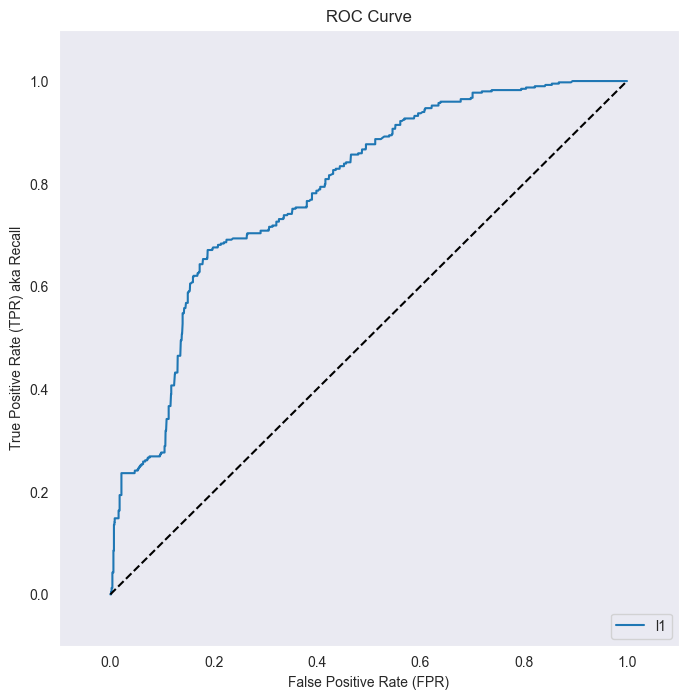

AUROC: 0.7864051642520449
Results for l2 

[[1934   67]
 [ 334   64]]
Accuracy score: 0.8328470195914964
Precision: 0.48854961832061067
Recall: 0.16080402010050251
F1: 0.24196597353497165


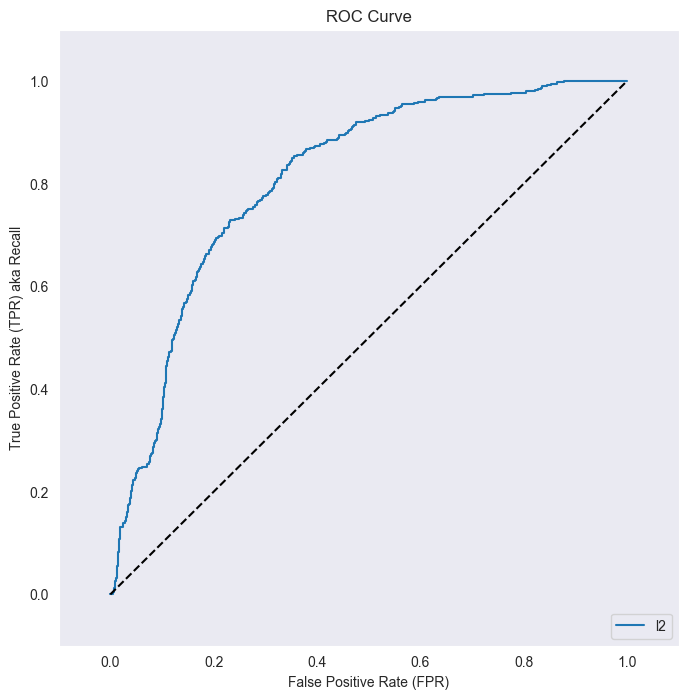

AUROC: 0.8106210713738607
Results for rf 

[[1995    6]
 [  34  364]]
Accuracy score: 0.9833263859941642
Precision: 0.9837837837837838
Recall: 0.914572864321608
F1: 0.9479166666666666


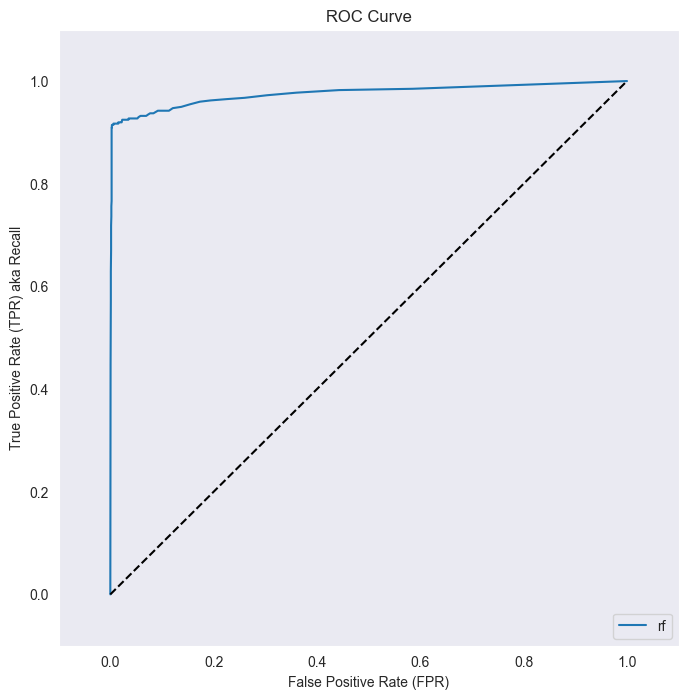

AUROC: 0.9754017463629994
Results for gb 

[[1984   17]
 [  33  365]]
Accuracy score: 0.9791579824927052
Precision: 0.9554973821989529
Recall: 0.9170854271356784
F1: 0.9358974358974359


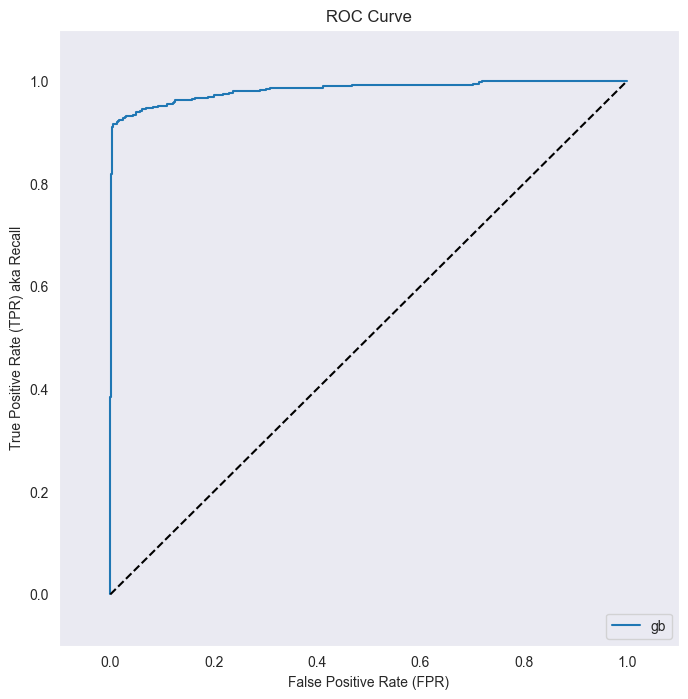

AUROC: 0.9832345133965681


In [48]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

for name, model in filter_model.items():
    print("Results for", name, "\n")

    # Make predictions
    pred = model.predict(x_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, pred)
    print(cm)

    # Accuracy Score
    print("Accuracy score:", accuracy_score(y_test, pred))

    # Precision
    precision = cm[1][1] / (cm[0][1] + cm[1][1])
    print("Precision:", precision)

    # Recall
    recall = cm[1][1] / (cm[1][0] + cm[1][1])
    print("Recall:", recall)

    # F1 Score
    print('F1:', f1_score(y_test, pred))

    # ROC Curve
    pred_prob = model.predict_proba(x_test)
    pred_prob = [p[1] for p in pred_prob]

    fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
    fig = plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=name)
    plt.title("ROC Curve")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR) aka Recall')
    plt.legend(loc="lower right")
    plt.show()

    # AUROC Score
    print('AUROC:', roc_auc_score(y_test, pred_prob))


save model as file

In [49]:
with open('model_v1,pkl', 'wb') as f:
    pickle.dump(filter_model['rf'].best_estimator_,f)

In [50]:
df= pd.read_csv('Analytical_table.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num,salary_high,salary_low,salary_medium,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


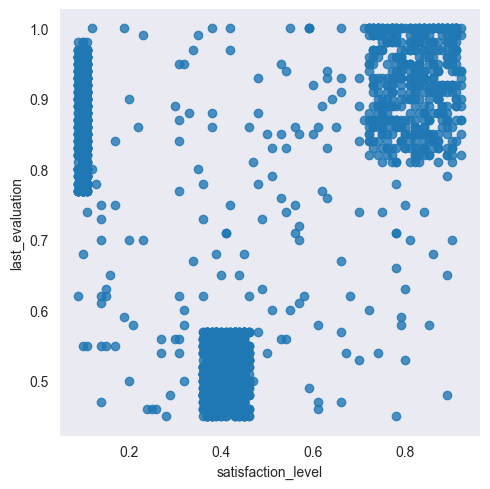

In [51]:
sb.lmplot(x='satisfaction_level', y='last_evaluation', data=df[df.left==1], fit_reg=False)
plt.show()


underperformer: last_evaluation <0.57

unhappy: satification <0.48

overachievers : last_evaluation >0.6 and satification >0.7



In [52]:

df['underperformer'] = ((df['last_evaluation'] < 0.57) & (~df['last_evaluation'].isna())).astype(int)
df['unhappy'] = (df['satisfaction_level'] < 0.48).astype(int)
df['overachievers'] = ((df['last_evaluation'] > 0.6) & (df['satisfaction_level'] > 0.7) & (~df['last_evaluation'].isna())).astype(int)


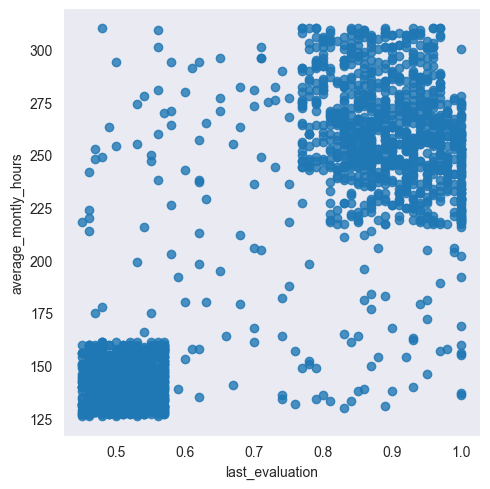

In [53]:
sb.lmplot(x='last_evaluation',
          y='average_montly_hours',
          data=df[df.left==1],
          fit_reg=False)
plt.show()

stars: average_monthly_hours > 215 and last_evaluation >0.75

stackers : average_monthly_hours < 165 and last_evaluation < 0.57


In [54]:
df['stars']=((df.average_montly_hours > 215) &(df.last_evaluation >0.76)).astype(int)
df['stackers']=((df.average_montly_hours <165) &(df.last_evaluation <0.57).astype(int))

workaholic: average_montly_hours > 215 and satisfaction_level > 0.75

justajob : average_montly_hours < 160 

overworked: average_montly_hours > 243 and satisfaction_level < 0.3

In [55]:
df['workaholic']=((df.average_montly_hours > 215) &(df.satisfaction_level >0.75)).astype(int)
df['justajob']=((df.average_montly_hours <160)).astype(int)
df['overworked']=((df.average_montly_hours >243) &(df.satisfaction_level <0.3)).astype(int)


In [56]:
df[['underperformer', 'unhappy','overachievers','stars','stackers','workaholic','justajob','overworked']].mean()

underperformer    0.246435
unhappy           0.240764
overachievers     0.331082
stars             0.225419
stackers          0.119756
workaholic        0.166125
justajob          0.265532
overworked        0.057877
dtype: float64

In [57]:
df.head()



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num,salary_high,salary_low,salary_medium,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,underperformer,unhappy,overachievers,stars,stackers,workaholic,justajob,overworked
0,0.38,0.53,2,157,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,True,0,1,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,False,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,False,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,False,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,True,0,1,0


In [58]:
df.shape

(11991, 30)

####save our analytical base table

In [59]:
df.to_csv('Analytical_table_v2.csv',index=None)


### 5. Training

In [60]:


# Prepare the data
y = df.left
x = df.drop('left', axis=1)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=492, stratify=df.left)

# Define the pipelines
pipelines = {
    'l1': make_pipeline(
        StandardScaler(),
        LogisticRegression(penalty='l1', random_state=123, solver='liblinear')
    ),
    'l2': make_pipeline(
        StandardScaler(),
        LogisticRegression(penalty='l2', random_state=123)
    ),
    'rf': make_pipeline(
        StandardScaler(), 
        RandomForestClassifier(random_state=123)
    ),
    'gb': make_pipeline(
        StandardScaler(),
        GradientBoostingClassifier(random_state=123)
    )
}

# Hyperparameter grids for each model
l1_hyperparameters = {
    'logisticregression__C': [0.001, 0.005, 0.01, 0.5, 1, 5, 10, 50, 100, 500, 1000]
}

l2_hyperparameters = {
    'logisticregression__C': [0.001, 0.005, 0.01, 0.5, 1, 5, 10, 50, 100, 500, 1000]
}

rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['sqrt', 'log2', 0.33],
    'randomforestclassifier__min_samples_leaf': [1, 3, 5, 10]
}

gb_hyperparameters = {
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}



hyperparameters = {
    'l1': l1_hyperparameters,
    'l2': l2_hyperparameters,
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters
}


filter_model = {}


print("Checking for NaN values:")
print(df.isna().sum())  



for name, pipeline in pipelines.items():
    print("Current fitting:", name)

   
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1, error_score='raise')  


    model.fit(x_train, y_train)
    
    # Save the model
    filter_model[name] = model
    
    print('Fitting for', name, "completed")


Checking for NaN values:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
salary_num               0
salary_high              0
salary_low               0
salary_medium            0
sales_IT                 0
sales_RandD              0
sales_accounting         0
sales_hr                 0
sales_management         0
sales_marketing          0
sales_product_mng        0
sales_sales              0
sales_support            0
sales_technical          0
underperformer           0
unhappy                  0
overachievers            0
stars                    0
stackers                 0
workaholic               0
justajob                 0
overworked               0
dtype: int64
Current fitting: l1
Fitting for l1 completed
Current fitting: l2
Fitting for l2 completed
Current fitting: rf
Fitting for rf completed
Current fitting: 

Results for l1 

[[1912   89]
 [ 111  287]]
Accuracy score: 0.9166319299708212
Precision: 0.7632978723404256
Recall: 0.7211055276381909
F1: 0.7416020671834626


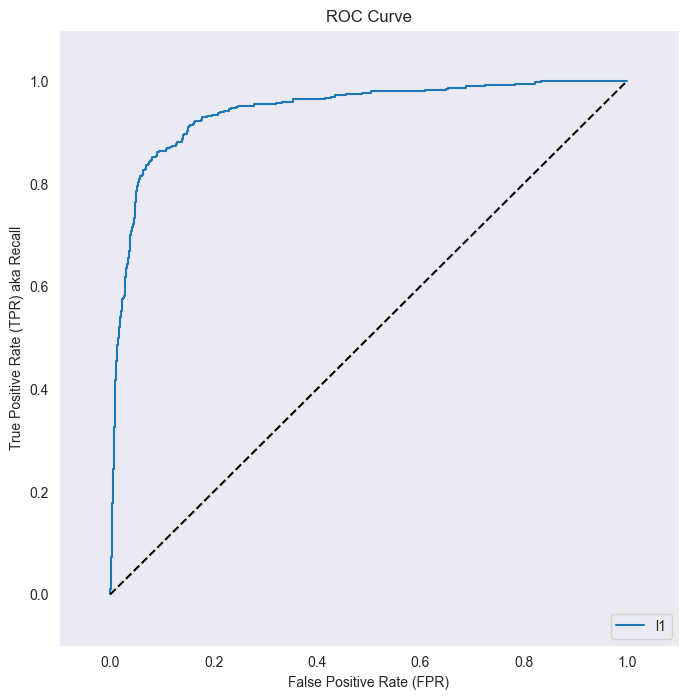

AUROC: 0.9421369717151474
Results for l2 

[[1912   89]
 [ 111  287]]
Accuracy score: 0.9166319299708212
Precision: 0.7632978723404256
Recall: 0.7211055276381909
F1: 0.7416020671834626


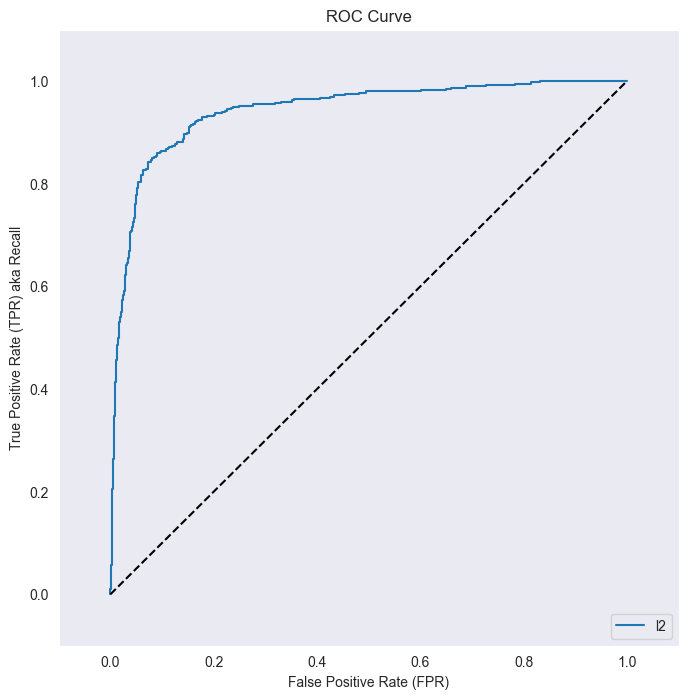

AUROC: 0.9422637927267523
Results for rf 

[[1993    8]
 [  33  365]]
Accuracy score: 0.9829095456440183
Precision: 0.9785522788203753
Recall: 0.9170854271356784
F1: 0.9468223086900129


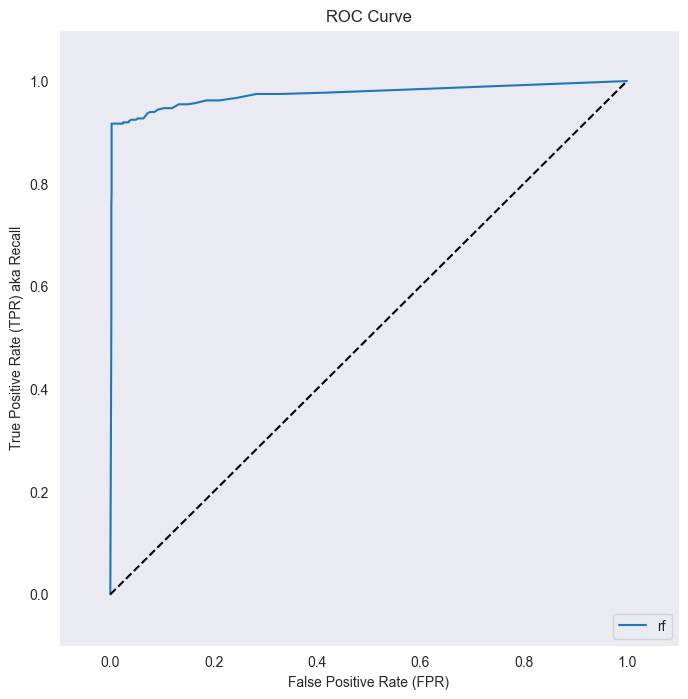

AUROC: 0.9743564147574453
Results for gb 

[[1987   14]
 [  34  364]]
Accuracy score: 0.9799916631929971
Precision: 0.9629629629629629
Recall: 0.914572864321608
F1: 0.9381443298969072


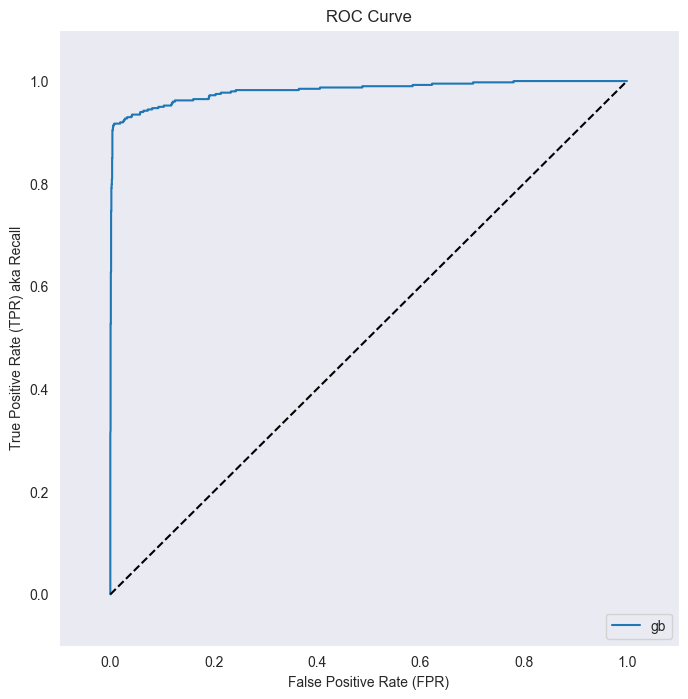

AUROC: 0.9819487241303971


In [61]:

for name, model in filter_model.items():
    print("Results for", name, "\n")

    # Make predictions
    pred = model.predict(x_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, pred)
    print(cm)

    # Accuracy Score
    print("Accuracy score:", accuracy_score(y_test, pred))

    # Precision
    precision = cm[1][1] / (cm[0][1] + cm[1][1])
    print("Precision:", precision)

    # Recall
    recall = cm[1][1] / (cm[1][0] + cm[1][1])
    print("Recall:", recall)

    # F1 Score
    print('F1:', f1_score(y_test, pred))

    # ROC Curve
    pred_prob = model.predict_proba(x_test)
    pred_prob = [p[1] for p in pred_prob]

    fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
    fig = plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=name)
    plt.title("ROC Curve")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR) aka Recall')
    plt.legend(loc="lower right")
    plt.show()

    # AUROC Score
    print('AUROC:', roc_auc_score(y_test, pred_prob))


AUROC for l1: 0.9421369717151474
AUROC for l2: 0.9422637927267523
AUROC for rf: 0.9743564147574453
AUROC for gb: 0.9819487241303971

Best model: gb with AUROC: 0.9819487241303971

Evaluating the best model: gb
Confusion Matrix:
 [[1987   14]
 [  34  364]]
Accuracy: 0.9799916631929971
Precision: 0.9629629629629629
Recall: 0.914572864321608
F1 Score: 0.9381443298969072


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


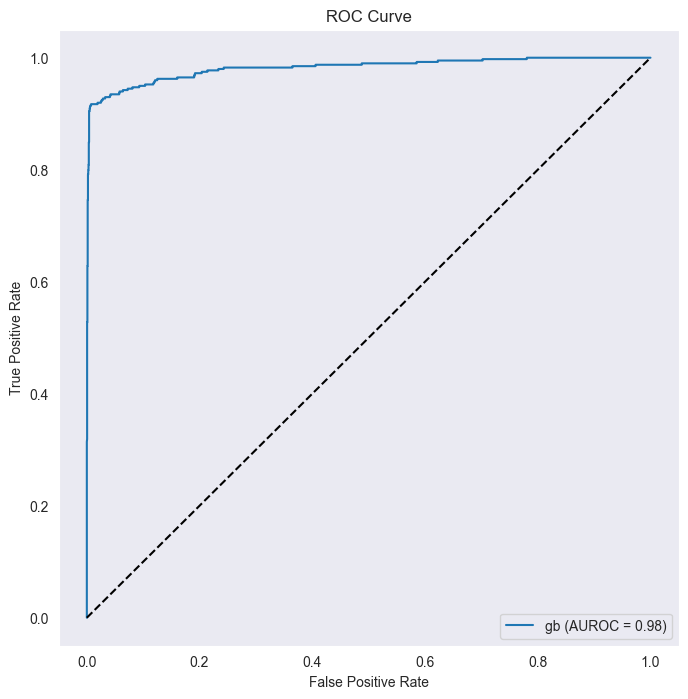

In [62]:

performance_metrics = {}


for name, model in filter_model.items():
    pred = model.predict(x_test)
    pred_prob = model.predict_proba(x_test)[:, 1]
    auroc = roc_auc_score(y_test, pred_prob)
    performance_metrics[name] = auroc
    print(f"AUROC for {name}: {auroc}")

# Find the best model based on AUROC
best_model_name = max(performance_metrics, key=performance_metrics.get)
best_model = filter_model[best_model_name]

print(f"\nBest model: {best_model_name} with AUROC: {performance_metrics[best_model_name]}")

# Evaluate the best model in detail
print(f"\nEvaluating the best model: {best_model_name}")
pred = best_model.predict(x_test)
cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy_score(y_test, pred))
print("Precision:", cm[1][1] / (cm[0][1] + cm[1][1]))
print("Recall:", cm[1][1] / (cm[1][0] + cm[1][1]))
print("F1 Score:", f1_score(y_test, pred))

# Plot ROC curve for the best model
pred_prob = best_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f"{best_model_name} (AUROC = {performance_metrics[best_model_name]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


### FINAL-TEST


In [75]:

satisfaction_level = float(input("Nhập mức độ hài lòng (satisfaction_level): "))
last_evaluation = float(input("Nhập đánh giá cuối cùng (last_evaluation): "))
number_project = int(input("Nhập số dự án (number_project): "))
average_montly_hours = int(input("Nhập số giờ làm việc trung bình hàng tháng (average_montly_hours): "))
time_spend_company = int(input("Nhập số năm làm việc tại công ty (time_spend_company): "))
Work_accident = int(input("Nhân viên có tai nạn lao động không? (1: Có, 0: Không): "))
promotion_last_5years = int(input("Nhân viên có được thăng chức trong 5 năm qua không? (1: Có, 0: Không): "))
sales = input("Nhập bộ phận (sales, technical, HR, ...): ")
salary = input("Nhập mức lương (low, medium, high): ")


input_data = {
    "satisfaction_level": [satisfaction_level],
    "last_evaluation": [last_evaluation],
    "number_project": [number_project],
    "average_montly_hours": [average_montly_hours],
    "time_spend_company": [time_spend_company],
    "Work_accident": [Work_accident],
    "promotion_last_5years": [promotion_last_5years],
    "sales": [sales],
    "salary": [salary]
}


input_df = pd.DataFrame(input_data)


input_df = pd.get_dummies(input_df, columns=['sales', 'salary'])

training_columns = list(x_test.columns)  
for col in training_columns:
    if col not in input_df.columns:
        input_df[col] = 0  


input_df = input_df[training_columns]


predicted_class = best_model.predict(input_df)
predicted_prob = best_model.predict_proba(input_df)[:, 1]


print(f"Dự đoán lớp: {predicted_class[0]}")  # 0: ở lại, 1: rời đi
print(f"Xác suất rời đi: {predicted_prob[0]:.2f}")



Dự đoán lớp: 1
Xác suất rời đi: 0.76
